# Chapter 3: Classification

---

## Rangkuman Chapter 3

Chapter ini membahas **Classification Tasks** menggunakan **MNIST Dataset** - dataset yang berisi 70,000 gambar tulisan tangan angka (0-9).

## Jenis-Jenis Classification

| Tipe | Deskripsi | Contoh |
|------|-----------|--------|
| **Binary Classification** | Membedakan 2 kelas | 5 vs bukan-5 |
| **Multiclass Classification** | Membedakan >2 kelas | Angka 0-9 |
| **Multilabel Classification** | Multiple binary tags per instance | Gambar dengan banyak objek |
| **Multioutput Classification** | Multiple multiclass labels | Image denoising |

## Performance Metrics

### Confusion Matrix

```
                Predicted
                Negative  Positive
Actual Negative    TN        FP
       Positive    FN        TP
```

**Komponen:**
- **TN (True Negative)**: Correctly predicted negative
- **FP (False Positive)**: Incorrectly predicted positive (Type I Error)
- **FN (False Negative)**: Incorrectly predicted negative (Type II Error)
- **TP (True Positive)**: Correctly predicted positive

### Precision

Akurasi dari positive predictions:

$$\text{Precision} = \frac{TP}{TP + FP}$$

**Kapan penting?**
- Ketika False Positive mahal
- Contoh: Spam filter, video safety classifier

### Recall (Sensitivity / TPR)

Ratio positive instances yang terdeteksi:

$$\text{Recall} = \frac{TP}{TP + FN}$$

**Kapan penting?**
- Ketika False Negative mahal
- Contoh: Cancer detection, shoplifter detection

### F₁ Score

Harmonic mean dari Precision dan Recall:

$$F_1 = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{TP}{TP + \frac{FN + FP}{2}}$$

**Karakteristik:**
- F₁ tinggi hanya jika Precision DAN Recall keduanya tinggi
- Harmonic mean memberi bobot lebih pada nilai rendah

### ROC Curve & AUC

**ROC (Receiver Operating Characteristic):**
- Plot TPR (Recall) vs FPR (False Positive Rate)
- FPR = 1 - Specificity = FP / (FP + TN)

**AUC (Area Under the Curve):**
- Perfect classifier: AUC = 1
- Random classifier: AUC = 0.5

**Kapan menggunakan ROC vs PR Curve?**

| Kondisi | Gunakan |
|---------|---------|
| Positive class jarang | **PR Curve** |
| Peduli pada False Positives | **PR Curve** |
| Balanced classes | **ROC Curve** |

## Precision/Recall Trade-off

```
┌────────────────────────────────────────────────────────┐
│  Threshold ↑  →  Precision ↑  &  Recall ↓              │
│  Threshold ↓  →  Precision ↓  &  Recall ↑              │
└────────────────────────────────────────────────────────┘
```

**Strategi pemilihan threshold:**
1. Plot Precision vs Recall curve
2. Tentukan requirement bisnis
3. Pilih threshold yang sesuai

## Multiclass Classification Strategies

### One-vs-Rest (OvR / One-vs-All)

```
Train N binary classifiers (N = jumlah kelas)
- Classifier 0: "0" vs "not 0"
- Classifier 1: "1" vs "not 1"
- ...
- Classifier 9: "9" vs "not 9"

Prediction: Pilih kelas dengan score tertinggi
```

### One-vs-One (OvO)

```
Train N×(N-1)/2 binary classifiers
- Classifier 0-1: "0" vs "1"
- Classifier 0-2: "0" vs "2"
- ...
- Classifier 8-9: "8" vs "9"

Prediction: Pilih kelas yang menang paling banyak
```

**Kapan menggunakan?**
- **OvO**: Untuk algoritma yang scale poorly (e.g., SVM)
- **OvR**: Untuk algoritma lainnya (lebih umum)

## Implementasi Kode

### Cell 1: Setup dan Load MNIST Dataset

In [8]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA available: True
GPU name: NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

print("Libraries imported!")

Libraries imported!


In [10]:
from sklearn.datasets import fetch_openml
import numpy as np

print("Downloading MNIST dataset...")
mnist = fetch_openml(
    'mnist_784', 
    version=1, 
    as_frame=False,        # Kembalikan sebagai numpy array
    parser='liac-arff'     # <-- PAKSA GUNAKAN PARSING TANPA PANDAS
)
print("Dataset loaded!")

X, y = mnist.data, mnist.target.astype(np.uint8)

print("\n" + "="*80)
print("MNIST DATASET STRUCTURE")
print("="*80)
print(f"Data type: {type(X)}")
print(f"X shape: {X.shape} → 70,000 images, 784 pixels (28×28)")
print(f"y shape: {y.shape}")
print(f"Pixel values: {X.min()} to {X.max()}")
print(f"Classes: {np.unique(y)}")

Dataset loaded!

MNIST DATASET STRUCTURE
Data type: <class 'numpy.ndarray'>
X shape: (70000, 784) → 70,000 images, 784 pixels (28×28)
y shape: (70000,)
Pixel values: 0.0 to 255.0
Classes: [0 1 2 3 4 5 6 7 8 9]


### Cell 2: Explore MNIST Data

In [12]:
# Get features and labels
X, y = mnist["data"], mnist["target"]

print("="*80)
print("DATASET SHAPE")
print("="*80)
print(f"Features (X): {X.shape}")
print(f"Labels (y):   {y.shape}")
print(f"\nTotal images: {X.shape[0]:,}")
print(f"Pixels per image: {X.shape[1]} (28×28)")
print(f"Pixel intensity: 0 (white) to 255 (black)")

# Convert labels to integers
y = y.astype(np.uint8)

print("\n" + "="*80)
print("LABEL DISTRIBUTION")
print("="*80)
unique, counts = np.unique(y, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count:>5,} images ({count/len(y)*100:.1f}%)")

DATASET SHAPE
Features (X): (70000, 784)
Labels (y):   (70000,)

Total images: 70,000
Pixels per image: 784 (28×28)
Pixel intensity: 0 (white) to 255 (black)

LABEL DISTRIBUTION
Digit 0: 6,903 images (9.9%)
Digit 1: 7,877 images (11.3%)
Digit 2: 6,990 images (10.0%)
Digit 3: 7,141 images (10.2%)
Digit 4: 6,824 images (9.7%)
Digit 5: 6,313 images (9.0%)
Digit 6: 6,876 images (9.8%)
Digit 7: 7,293 images (10.4%)
Digit 8: 6,825 images (9.8%)
Digit 9: 6,958 images (9.9%)


### Cell 3: Visualize MNIST Images

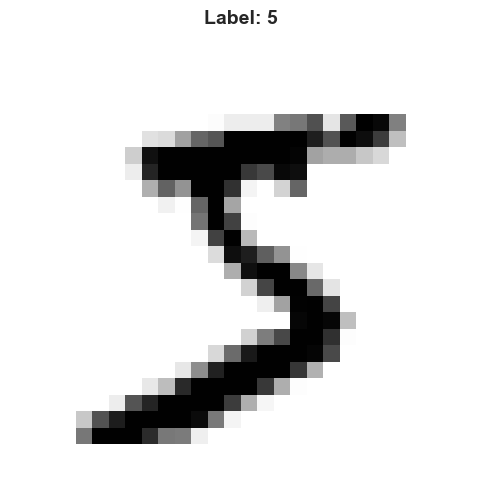

First image label: 5


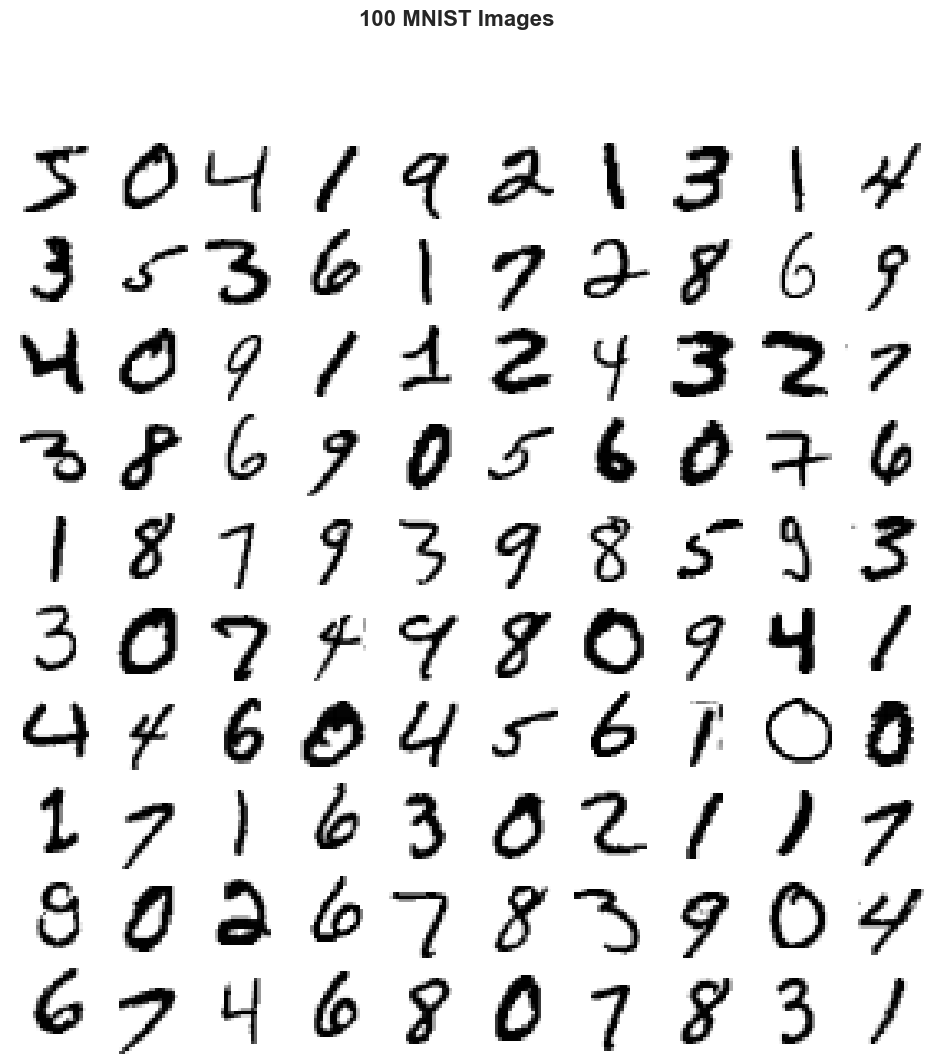

In [13]:
def plot_digit(data, label=None):
    """Plot a single digit"""
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    if label is not None:
        plt.title(f'Label: {label}', fontsize=14, fontweight='bold')

def plot_digits(instances, images_per_row=10, **options):
    """Plot multiple digits in a grid"""
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    
    plt.imshow(big_image, cmap='binary', **options)
    plt.axis('off')

# Visualize first image
some_digit = X.iloc[0] if hasattr(X, 'iloc') else X[0]
some_label = y[0]

plt.figure(figsize=(6, 6))
plot_digit(some_digit, some_label)
plt.show()

print(f"First image label: {some_label}")

# Visualize multiple images
plt.figure(figsize=(12, 12))
example_images = X[:100] if hasattr(X, 'iloc') else X[:100]
plot_digits(np.array(example_images), images_per_row=10)
plt.suptitle('100 MNIST Images', fontsize=16, fontweight='bold', y=0.98)
plt.show()

### Cell 4: Split Train/Test Sets

In [14]:
# MNIST is already split: first 60k = train, last 10k = test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print("="*80)
print("TRAIN/TEST SPLIT")
print("="*80)
print(f"Training set:   {len(X_train):>6,} images")
print(f"Test set:       {len(X_test):>6,} images")
print(f"Test ratio:     {len(X_test)/len(X)*100:>6.1f}%")

print("\nTraining set already shuffled (good for cross-validation)")
print("Never look at test set until final evaluation!")

TRAIN/TEST SPLIT
Training set:   60,000 images
Test set:       10,000 images
Test ratio:       14.3%

Training set already shuffled (good for cross-validation)
Never look at test set until final evaluation!


### Cell 5: Binary Classification - Detect 5s

In [15]:
from sklearn.linear_model import SGDClassifier

# Create binary target: True for 5s, False for others
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print("="*80)
print("BINARY CLASSIFICATION: 5-DETECTOR")
print("="*80)
print(f"Training samples:")
print(f"  Class '5':     {y_train_5.sum():>6,} ({y_train_5.sum()/len(y_train_5)*100:.1f}%)")
print(f"  Class 'not-5': {(~y_train_5).sum():>6,} ({(~y_train_5).sum()/len(y_train_5)*100:.1f}%)")

# Train SGD Classifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train_5)

print("\nSGDClassifier trained!")

# Test prediction
prediction = sgd_clf.predict([some_digit])
print(f"\nPrediction for first image (label={some_label}):")
print(f"  Is it a 5? {prediction[0]}")
print(f"  {'Correct!' if (prediction[0] and some_label == 5) or (not prediction[0] and some_label != 5) else 'Wrong!'}")

BINARY CLASSIFICATION: 5-DETECTOR
Training samples:
  Class '5':      5,421 (9.0%)
  Class 'not-5': 54,579 (91.0%)

SGDClassifier trained!

Prediction for first image (label=5):
  Is it a 5? True
  Correct!


### Cell 6: Cross-Validation Accuracy

In [16]:
# Evaluate using cross-validation
print("="*80)
print("CROSS-VALIDATION EVALUATION")
print("="*80)
print("Performing 3-fold cross-validation...")

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print(f"\nAccuracy scores: {scores}")
print(f"Mean accuracy:   {scores.mean():.4f}")
print(f"Std deviation:   {scores.std():.4f}")

# Compare with dummy classifier
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    """Dummy classifier that always predicts 'not-5'"""
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
dummy_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print("\n" + "="*80)
print("COMPARISON WITH DUMMY CLASSIFIER")
print("="*80)
print(f"Dummy classifier (always predicts 'not-5'):")
print(f"  Accuracy: {dummy_scores.mean():.4f}")
print(f"\nHigh accuracy doesn't mean good classifier!")
print(f"    Only ~{y_train_5.sum()/len(y_train_5)*100:.0f}% are 5s, so guessing 'not-5' gives ~{dummy_scores.mean()*100:.0f}% accuracy")
print(f"\nNeed better metrics: Precision, Recall, F₁ Score")

CROSS-VALIDATION EVALUATION
Performing 3-fold cross-validation...

Accuracy scores: [0.95035 0.96035 0.9604 ]
Mean accuracy:   0.9570
Std deviation:   0.0047

COMPARISON WITH DUMMY CLASSIFIER
Dummy classifier (always predicts 'not-5'):
  Accuracy: 0.9096

High accuracy doesn't mean good classifier!
    Only ~9% are 5s, so guessing 'not-5' gives ~91% accuracy

Need better metrics: Precision, Recall, F₁ Score


### Cell 7: Confusion Matrix

CONFUSION MATRIX
[[53892   687]
 [ 1891  3530]]

Component                 Count Description
--------------------------------------------------------------------------------
True Negatives (TN)      53,892   Correctly predicted as 'not-5'
False Positives (FP)        687   Wrongly predicted as '5'
False Negatives (FN)      1,891   Wrongly predicted as 'not-5'
True Positives (TP)       3,530   Correctly predicted as '5'


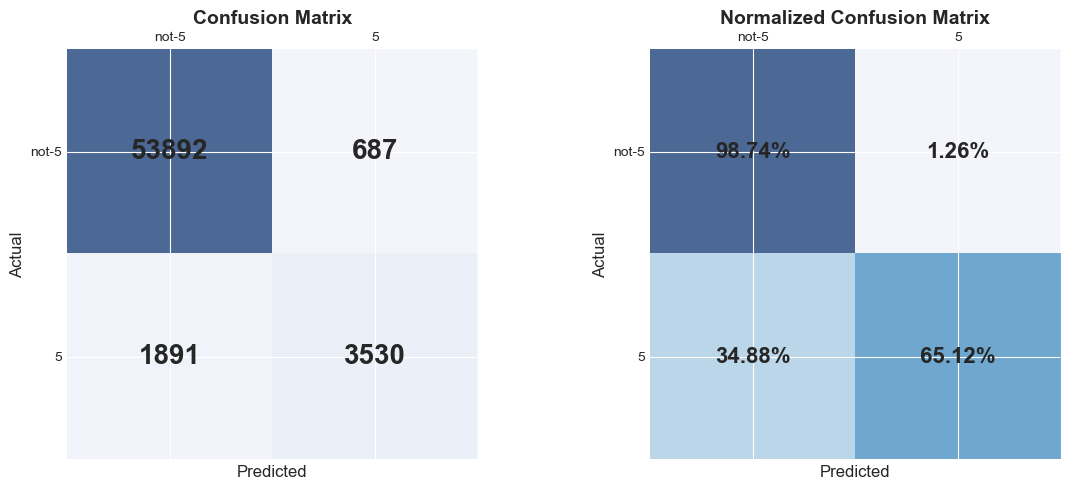

In [17]:
# Get predictions using cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Compute confusion matrix
conf_mx = confusion_matrix(y_train_5, y_train_pred)

print("="*80)
print("CONFUSION MATRIX")
print("="*80)
print(conf_mx)

# Extract values
tn, fp, fn, tp = conf_mx.ravel()

print(f"\n{'Component':<20} {'Count':>10} {'Description'}")
print("-"*80)
print(f"{'True Negatives (TN)':<20} {tn:>10,}   Correctly predicted as 'not-5'")
print(f"{'False Positives (FP)':<20} {fp:>10,}   Wrongly predicted as '5'")
print(f"{'False Negatives (FN)':<20} {fn:>10,}   Wrongly predicted as 'not-5'")
print(f"{'True Positives (TP)':<20} {tp:>10,}   Correctly predicted as '5'")

# Visualize confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw confusion matrix
axes[0].matshow(conf_mx, cmap='Blues', alpha=0.7)
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, conf_mx[i, j], ha='center', va='center', 
                    fontsize=20, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['not-5', '5'])
axes[0].set_yticklabels(['not-5', '5'])

# Normalized confusion matrix
conf_mx_norm = conf_mx / conf_mx.sum(axis=1, keepdims=True)
axes[1].matshow(conf_mx_norm, cmap='Blues', alpha=0.7)
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, f'{conf_mx_norm[i, j]:.2%}', ha='center', va='center',
                    fontsize=16, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['not-5', '5'])
axes[1].set_yticklabels(['not-5', '5'])

plt.tight_layout()
plt.show()

### Cell 8: Precision, Recall, and F₁ Score

In [18]:
# Calculate metrics
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print("="*80)
print("CLASSIFICATION METRICS")
print("="*80)
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F₁ Score:  {f1:.4f}")

# Manual calculation for verification
print("\n" + "="*80)
print("MANUAL CALCULATION (Verification)")
print("="*80)
print(f"Precision = TP / (TP + FP) = {tp} / ({tp} + {fp}) = {tp/(tp+fp):.4f}")
print(f"Recall    = TP / (TP + FN) = {tp} / ({tp} + {fn}) = {tp/(tp+fn):.4f}")
print(f"F₁        = 2 × (P × R) / (P + R) = {2*precision*recall/(precision+recall):.4f}")

# Interpretation
print("\n" + "="*80)
print("INTERPRETATION")
print("="*80)
print(f"• When classifier says '5': correct {precision*100:.1f}% of time")
print(f"• Detects {recall*100:.1f}% of all actual 5s")
print(f"• F₁ score balances both metrics")

CLASSIFICATION METRICS
Precision: 0.8371 (83.71%)
Recall:    0.6512 (65.12%)
F₁ Score:  0.7325

MANUAL CALCULATION (Verification)
Precision = TP / (TP + FP) = 3530 / (3530 + 687) = 0.8371
Recall    = TP / (TP + FN) = 3530 / (3530 + 1891) = 0.6512
F₁        = 2 × (P × R) / (P + R) = 0.7325

INTERPRETATION
• When classifier says '5': correct 83.7% of time
• Detects 65.1% of all actual 5s
• F₁ score balances both metrics


### Cell 9: Precision/Recall Trade-off

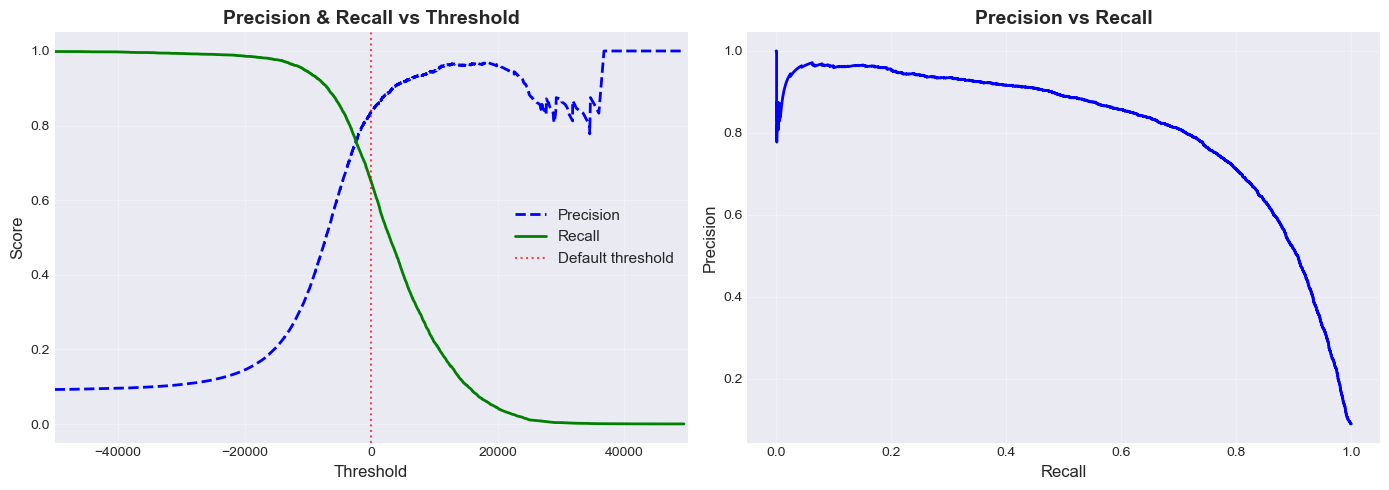

Observations:
• Increasing threshold → Precision ↑, Recall ↓
• Decreasing threshold → Precision ↓, Recall ↑
• Choose threshold based on business requirements


In [19]:
from sklearn.metrics import precision_recall_curve

# Get decision scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                             method="decision_function")

# Compute precision and recall for all thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot Precision and Recall vs Threshold
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Precision & Recall vs Threshold
axes[0].plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
axes[0].plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
axes[0].axvline(x=0, color='red', linestyle=':', alpha=0.7, label='Default threshold')
axes[0].set_xlabel('Threshold', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Precision & Recall vs Threshold', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([-50000, 50000])

# Plot 2: Precision vs Recall
axes[1].plot(recalls, precisions, 'b-', linewidth=2)
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Precision vs Recall', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observations:")
print("• Increasing threshold → Precision ↑, Recall ↓")
print("• Decreasing threshold → Precision ↓, Recall ↑")
print("• Choose threshold based on business requirements")

### Cell 10: Select Threshold for Target Precision

In [20]:
# Target: 90% precision
target_precision = 0.90

# Find threshold
idx = np.argmax(precisions >= target_precision)
threshold_90 = thresholds[idx]
precision_90 = precisions[idx]
recall_90 = recalls[idx]

print("="*80)
print("THRESHOLD SELECTION FOR 90% PRECISION")
print("="*80)
print(f"Target precision:  {target_precision:.0%}")
print(f"Selected threshold: {threshold_90:,.2f}")
print(f"Actual precision:  {precision_90:.4f} ({precision_90*100:.2f}%)")
print(f"Recall at this threshold: {recall_90:.4f} ({recall_90*100:.2f}%)")

# Make predictions with new threshold
y_train_pred_90 = (y_scores >= threshold_90)

# Verify
precision_check = precision_score(y_train_5, y_train_pred_90)
recall_check = recall_score(y_train_5, y_train_pred_90)

print("\n" + "="*80)
print("VERIFICATION")
print("="*80)
print(f"Precision: {precision_check:.4f}")
print(f"Recall:    {recall_check:.4f}")

print("\nTrade-off:")
print(f"  Precision ↑ from {precision*100:.1f}% to {precision_check*100:.1f}%")
print(f"  Recall ↓ from {recall*100:.1f}% to {recall_check*100:.1f}%")

THRESHOLD SELECTION FOR 90% PRECISION
Target precision:  90%
Selected threshold: 3,370.02
Actual precision:  0.9000 (90.00%)
Recall at this threshold: 0.4800 (48.00%)

VERIFICATION
Precision: 0.9000
Recall:    0.4800

Trade-off:
  Precision ↑ from 83.7% to 90.0%
  Recall ↓ from 65.1% to 48.0%


### Cell 11: ROC Curve and AUC

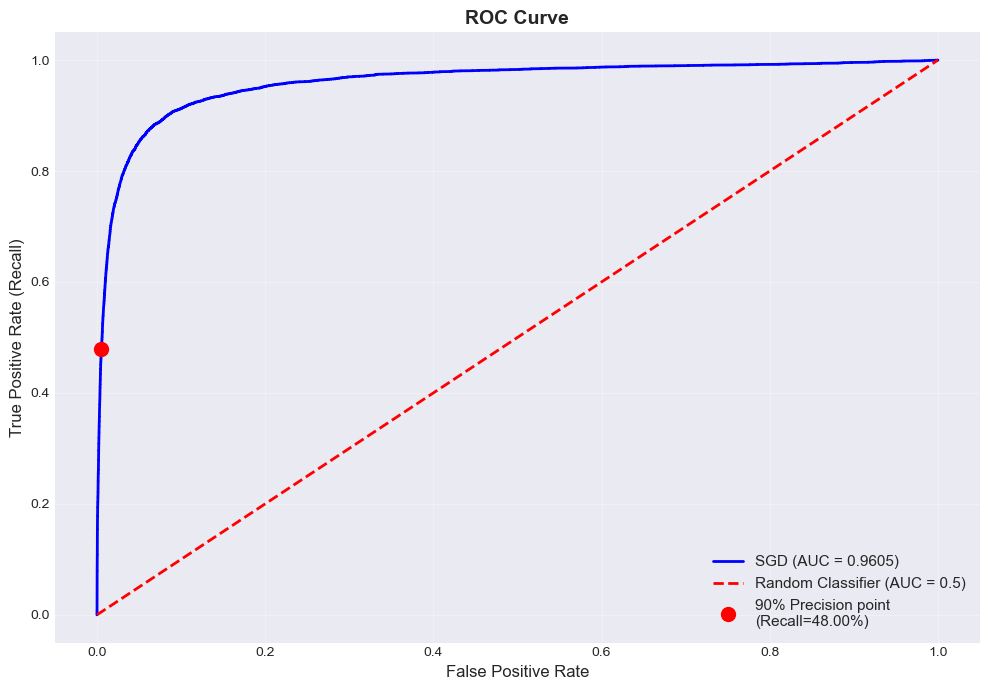

ROC AUC SCORE
AUC: 0.9605

Interpretation:
• Perfect classifier: AUC = 1.0
• Random classifier:  AUC = 0.5
• Our classifier:     AUC = 0.9605 Good!


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_train_5, y_scores)

# Compute AUC
roc_auc = roc_auc_score(y_train_5, y_scores)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'SGD (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier (AUC = 0.5)')

# Highlight point at recall ~43.7%
idx_recall = np.argmin(np.abs(tpr - recall_90))
plt.plot(fpr[idx_recall], tpr[idx_recall], 'ro', markersize=10, 
         label=f'90% Precision point\n(Recall={tpr[idx_recall]:.2%})')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("="*80)
print("ROC AUC SCORE")
print("="*80)
print(f"AUC: {roc_auc:.4f}")
print(f"\nInterpretation:")
print(f"• Perfect classifier: AUC = 1.0")
print(f"• Random classifier:  AUC = 0.5")
print(f"• Our classifier:     AUC = {roc_auc:.4f} {'Good!' if roc_auc > 0.9 else 'Could be better'}")

### Cell 12: Compare with Random Forest

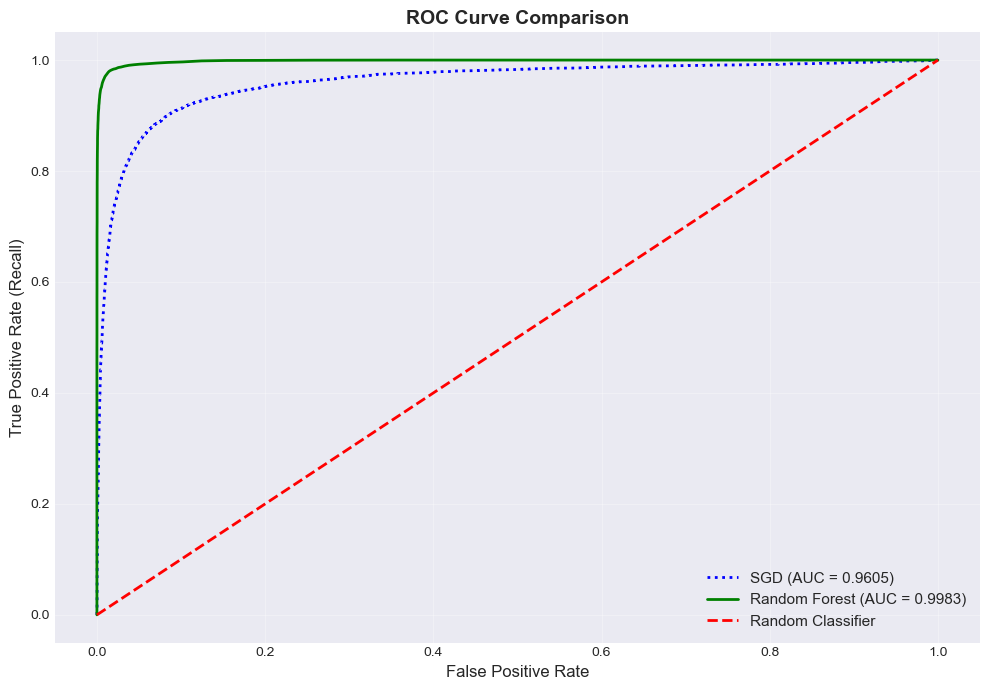

MODEL COMPARISON
Model                       AUC
-----------------------------------
SGD Classifier           0.9605
Random Forest            0.9983

Random Forest is better (closer to top-left corner)

Random Forest Performance:
  Precision: 0.9905 (99.1%)
  Recall:    0.8663 (86.6%)


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method="predict_proba")

# Get probabilities for positive class
y_scores_forest = y_probas_forest[:, 1]

# Compute ROC curve
fpr_forest, tpr_forest, _ = roc_curve(y_train_5, y_scores_forest)
roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)

# Plot comparison
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, 'b:', linewidth=2, label=f'SGD (AUC = {roc_auc:.4f})')
plt.plot(fpr_forest, tpr_forest, 'g-', linewidth=2, 
         label=f'Random Forest (AUC = {roc_auc_forest:.4f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("="*80)
print("MODEL COMPARISON")
print("="*80)
print(f"{'Model':<20} {'AUC':>10}")
print("-"*35)
print(f"{'SGD Classifier':<20} {roc_auc:>10.4f}")
print(f"{'Random Forest':<20} {roc_auc_forest:>10.4f}")

print(f"\nRandom Forest is better (closer to top-left corner)")

# Compute precision and recall for Random Forest
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_forest = precision_score(y_train_5, y_train_pred_forest)
recall_forest = recall_score(y_train_5, y_train_pred_forest)

print(f"\nRandom Forest Performance:")
print(f"  Precision: {precision_forest:.4f} ({precision_forest*100:.1f}%)")
print(f"  Recall:    {recall_forest:.4f} ({recall_forest*100:.1f}%)")

### Cell 13: Multiclass Classification

In [23]:
from sklearn.svm import SVC

# Train SVM on full dataset (0-9)
print("="*80)
print("MULTICLASS CLASSIFICATION (Digits 0-9)")
print("="*80)
print("Training SVM classifier...")

svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:5000], y_train[:5000])  # Use subset for speed

print("SVM trained!")

# Make prediction
prediction = svm_clf.predict([some_digit])
print(f"\nPrediction for first image: {prediction[0]}")
print(f"Actual label: {some_label}")
print(f"{'Correct!' if prediction[0] == some_label else 'Wrong!'}")

# Get decision scores
some_digit_scores = svm_clf.decision_function([some_digit])
print(f"\n{'='*80}")
print("DECISION SCORES FOR EACH CLASS")
print("="*80)
for i, score in enumerate(some_digit_scores[0]):
    marker = " ← HIGHEST" if i == np.argmax(some_digit_scores) else ""
    print(f"Class {i}: {score:>10.4f}{marker}")

print(f"\nSVM uses One-vs-One (OvO) strategy:")
print(f"   Trained {len(svm_clf.classes_)*(len(svm_clf.classes_)-1)//2} binary classifiers")

MULTICLASS CLASSIFICATION (Digits 0-9)
Training SVM classifier...
SVM trained!

Prediction for first image: 5
Actual label: 5
Correct!

DECISION SCORES FOR EACH CLASS
Class 0:     0.8069
Class 1:     8.0354
Class 2:     1.8181
Class 3:     2.8250
Class 4:     5.9150
Class 5:     9.2951 ← HIGHEST
Class 6:     4.8373
Class 7:     6.9724
Class 8:    -0.2104
Class 9:     3.8279

SVM uses One-vs-One (OvO) strategy:
   Trained 45 binary classifiers


### Cell 14: SGD Multiclass Classification

In [24]:
from sklearn.preprocessing import StandardScaler

# Scale features
print("="*80)
print("SGD MULTICLASS CLASSIFICATION WITH SCALING")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Train SGD on scaled data
sgd_clf_multi = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf_multi.fit(X_train_scaled, y_train)

print("SGD classifier trained!")

# Evaluate with cross-validation
scores = cross_val_score(sgd_clf_multi, X_train_scaled, y_train, 
                        cv=3, scoring="accuracy")

print(f"\n{'='*80}")
print("CROSS-VALIDATION RESULTS")
print("="*80)
print(f"Accuracy scores: {scores}")
print(f"Mean accuracy:   {scores.mean():.4f} ({scores.mean()*100:.2f}%)")
print(f"Std deviation:   {scores.std():.4f}")

print(f"\nMuch better than random guessing (10%)!")
print(f"Feature scaling improved performance significantly")

SGD MULTICLASS CLASSIFICATION WITH SCALING
SGD classifier trained!

CROSS-VALIDATION RESULTS
Accuracy scores: [0.8983 0.891  0.9018]
Mean accuracy:   0.8970 (89.70%)
Std deviation:   0.0045

Much better than random guessing (10%)!
Feature scaling improved performance significantly


### Cell 15: Multiclass Confusion Matrix

MULTICLASS CONFUSION MATRIX
[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


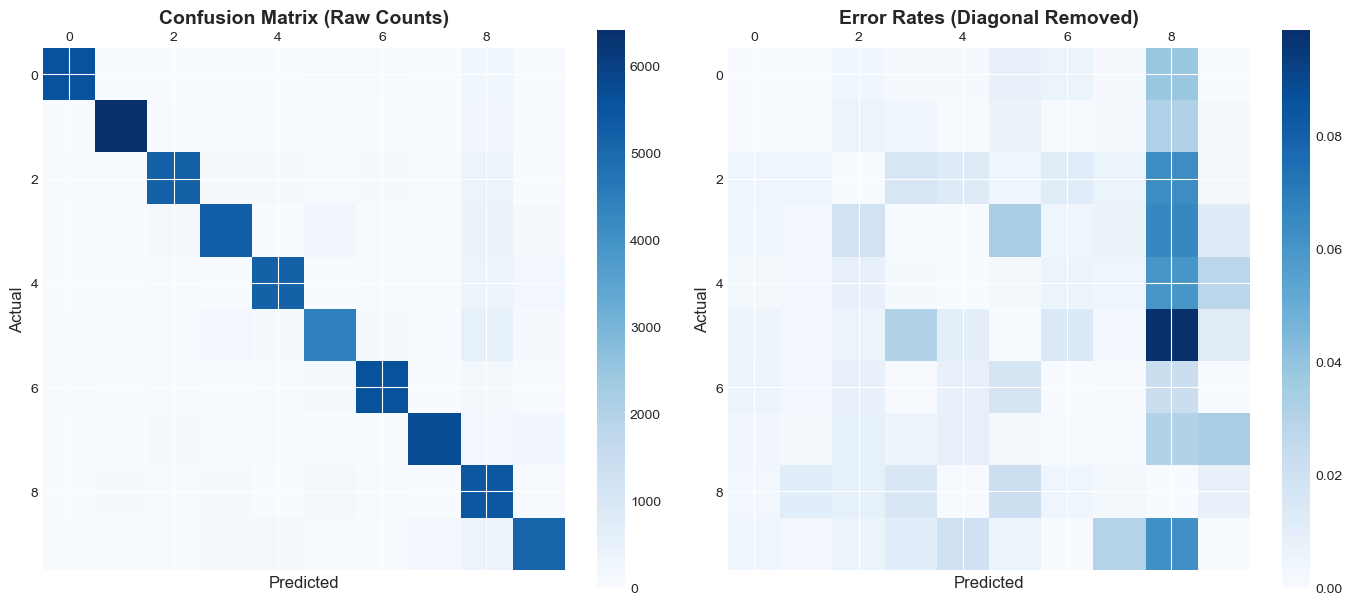


Analysis:
• Bright columns → Many false predictions to that class
• Bright rows → That class is often misclassified
• Example: 3s and 5s often confused with each other


In [25]:
# Get predictions
y_train_pred_multi = cross_val_predict(sgd_clf_multi, X_train_scaled, y_train, cv=3)

# Compute confusion matrix
conf_mx_multi = confusion_matrix(y_train, y_train_pred_multi)

print("="*80)
print("MULTICLASS CONFUSION MATRIX")
print("="*80)
print(conf_mx_multi)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Raw confusion matrix
im1 = axes[0].matshow(conf_mx_multi, cmap='Blues')
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Confusion Matrix (Raw Counts)', fontsize=14, fontweight='bold')
plt.colorbar(im1, ax=axes[0])

# Normalized confusion matrix (focus on errors)
row_sums = conf_mx_multi.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_multi / row_sums
np.fill_diagonal(norm_conf_mx, 0)  # Remove diagonal to focus on errors

im2 = axes[1].matshow(norm_conf_mx, cmap='Blues')
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title('Error Rates (Diagonal Removed)', fontsize=14, fontweight='bold')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

print("\nAnalysis:")
print("• Bright columns → Many false predictions to that class")
print("• Bright rows → That class is often misclassified")
print("• Example: 3s and 5s often confused with each other")

### Cell 16: Error Analysis - 3s vs 5s

ERROR ANALYSIS: 3s vs 5s
Correctly classified as 3: 5,227
3s misclassified as 5:    203
5s misclassified as 3:    168
Correctly classified as 5: 4,444


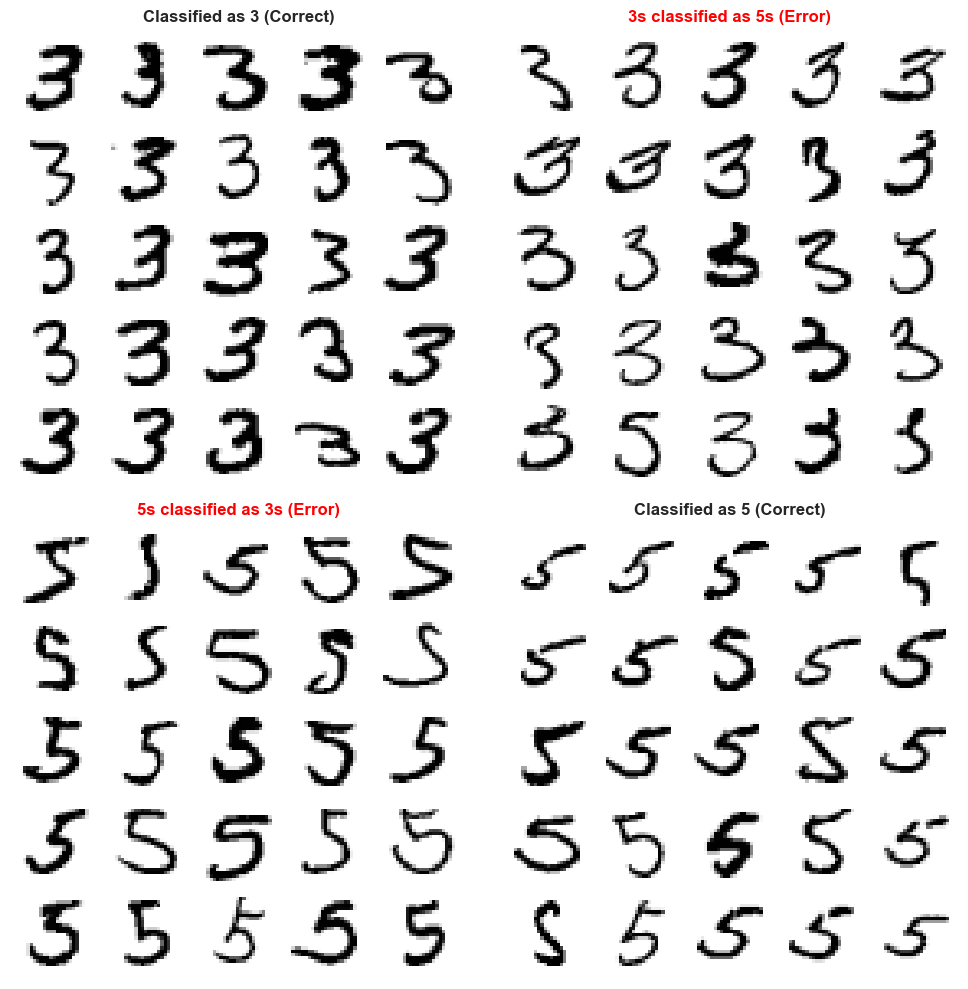


Insights:
• Many 3s and 5s are similar in appearance
• Linear models sensitive to small differences
• Solution: Better preprocessing, feature engineering, or CNN


In [26]:
# Analyze confusion between 3s and 5s
cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred_multi == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred_multi == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred_multi == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred_multi == cl_b)]

print("="*80)
print(f"ERROR ANALYSIS: {cl_a}s vs {cl_b}s")
print("="*80)
print(f"Correctly classified as {cl_a}: {len(X_aa):>5,}")
print(f"{cl_a}s misclassified as {cl_b}:  {len(X_ab):>5,}")
print(f"{cl_b}s misclassified as {cl_a}:  {len(X_ba):>5,}")
print(f"Correctly classified as {cl_b}: {len(X_bb):>5,}")

# Visualize confusion cases
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
plot_digits(np.array(X_aa[:25]), images_per_row=5)
plt.title(f'Classified as {cl_a} (Correct)', fontsize=12, fontweight='bold')

plt.subplot(222)
plot_digits(np.array(X_ab[:25]), images_per_row=5)
plt.title(f'{cl_a}s classified as {cl_b}s (Error)', fontsize=12, fontweight='bold', color='red')

plt.subplot(223)
plot_digits(np.array(X_ba[:25]), images_per_row=5)
plt.title(f'{cl_b}s classified as {cl_a}s (Error)', fontsize=12, fontweight='bold', color='red')

plt.subplot(224)
plot_digits(np.array(X_bb[:25]), images_per_row=5)
plt.title(f'Classified as {cl_b} (Correct)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nInsights:")
print(f"• Many {cl_a}s and {cl_b}s are similar in appearance")
print("• Linear models sensitive to small differences")
print("• Solution: Better preprocessing, feature engineering, or CNN")

### Cell 17: Multilabel Classification

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Create multilabel targets
y_train_large = (y_train >= 7)  # True if digit is 7, 8, or 9
y_train_odd = (y_train % 2 == 1)  # True if digit is odd
y_multilabel = np.c_[y_train_large, y_train_odd]

print("="*80)
print("MULTILABEL CLASSIFICATION")
print("="*80)
print("Two labels per instance:")
print("  1. Is digit large? (≥7)")
print("  2. Is digit odd?")

# Train KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

print("\nKNN classifier trained!")

# Make prediction
prediction = knn_clf.predict([some_digit])
print(f"\nPrediction for digit {some_label}:")
print(f"  Is large (≥7)? {prediction[0][0]}")
print(f"  Is odd?        {prediction[0][1]}")

# Verify
actual_large = some_label >= 7
actual_odd = some_label % 2 == 1
print(f"\nActual:")
print(f"  Is large (≥7)? {actual_large}")
print(f"  Is odd?        {actual_odd}")

print(f"\n{'Correct!' if np.array_equal(prediction[0], [actual_large, actual_odd]) else 'Wrong!'}")

# Evaluate with F1 score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_multilabel = f1_score(y_multilabel, y_train_knn_pred, average="macro")

print(f"\n{'='*80}")
print("MULTILABEL EVALUATION")
print("="*80)
print(f"F₁ Score (macro average): {f1_multilabel:.4f}")
print(f"\n'macro' average: Equal weight to all labels")

MULTILABEL CLASSIFICATION
Two labels per instance:
  1. Is digit large? (≥7)
  2. Is digit odd?

KNN classifier trained!


  File "c:\Users\Naufal\miniconda3\envs\Machinelearning\lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\Naufal\miniconda3\envs\Machinelearning\lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
  File "c:\Users\Naufal\miniconda3\envs\Machinelearning\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Naufal\miniconda3\envs\Machinelearning\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Naufal\miniconda3\envs\Machinelearning\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,



Prediction for digit 5:
  Is large (≥7)? False
  Is odd?        True

Actual:
  Is large (≥7)? False
  Is odd?        True

Correct!

MULTILABEL EVALUATION
F₁ Score (macro average): 0.9764

'macro' average: Equal weight to all labels


### Cell 18: Multioutput Classification - Image Denoising

MULTIOUTPUT CLASSIFICATION: IMAGE DENOISING
Task: Remove noise from images
  Input:  Noisy image (28×28 = 784 pixel intensities)
  Output: Clean image (784 pixel intensities)
  Type:   Multioutput (784 outputs, each 0-255)


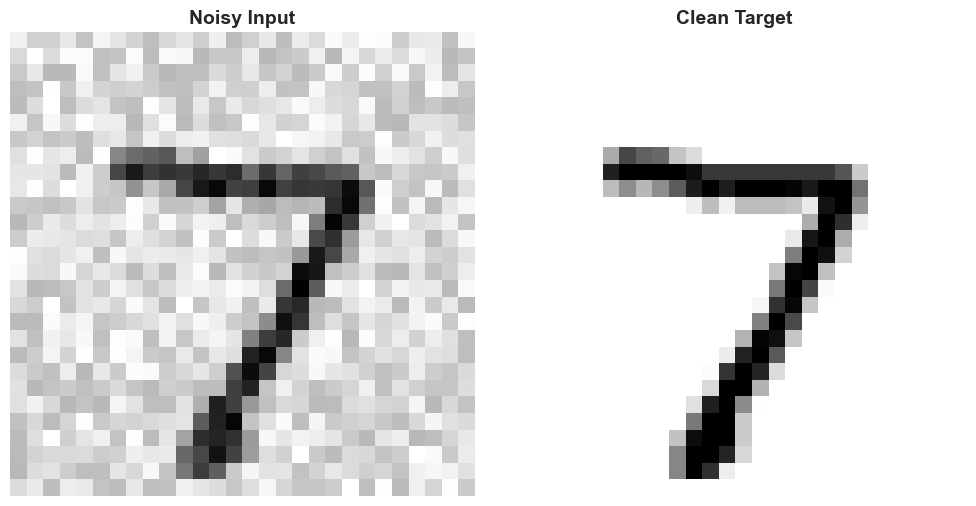

In [28]:
# Add noise to images
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test

# Target is the original clean image
y_train_mod = X_train
y_test_mod = X_test

print("="*80)
print("MULTIOUTPUT CLASSIFICATION: IMAGE DENOISING")
print("="*80)
print("Task: Remove noise from images")
print(f"  Input:  Noisy image (28×28 = 784 pixel intensities)")
print(f"  Output: Clean image (784 pixel intensities)")
print(f"  Type:   Multioutput (784 outputs, each 0-255)")

# Visualize noisy vs clean
some_index = 0
noisy_digit = X_test_mod.iloc[some_index] if hasattr(X_test_mod, 'iloc') else X_test_mod[some_index]
clean_digit = y_test_mod.iloc[some_index] if hasattr(y_test_mod, 'iloc') else y_test_mod[some_index]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.array(noisy_digit).reshape(28, 28), cmap='binary')
axes[0].set_title('Noisy Input', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(np.array(clean_digit).reshape(28, 28), cmap='binary')
axes[1].set_title('Clean Target', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()


Training KNN for image denoising (may take a while)...
Model trained!


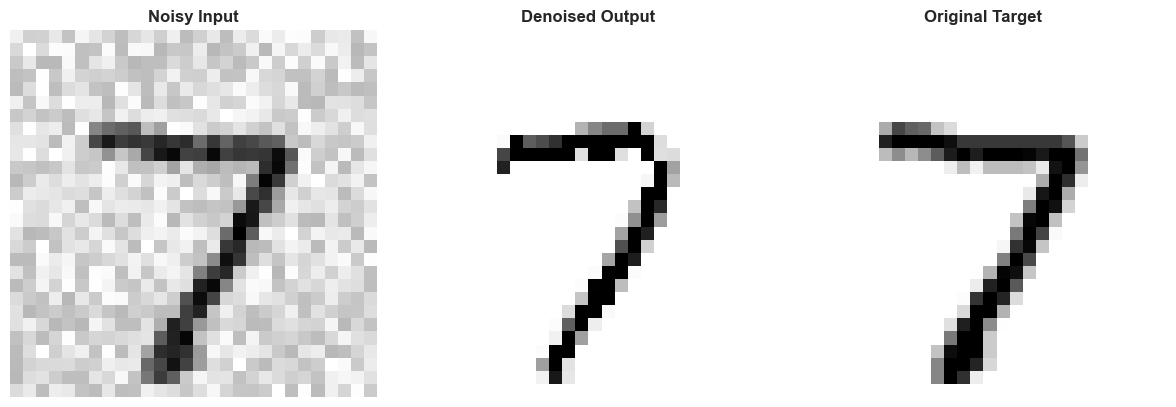


Image successfully denoised!
This demonstrates multioutput classification


In [29]:
# Train KNN for denoising
print("\nTraining KNN for image denoising (may take a while)...")
knn_clf.fit(X_train_mod[:5000], y_train_mod[:5000])  # Use subset for speed
print("Model trained!")

# Denoise the test image
clean_digit_pred = knn_clf.predict([noisy_digit])

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(np.array(noisy_digit).reshape(28, 28), cmap='binary')
axes[0].set_title('Noisy Input', fontsize=12, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(clean_digit_pred.reshape(28, 28), cmap='binary')
axes[1].set_title('Denoised Output', fontsize=12, fontweight='bold')
axes[1].axis('off')

axes[2].imshow(np.array(clean_digit).reshape(28, 28), cmap='binary')
axes[2].set_title('Original Target', fontsize=12, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\nImage successfully denoised!")
print("This demonstrates multioutput classification")

## Kesimpulan Chapter 3

### Summary Metrics & Methods

In [31]:
print("="*80)
print("CHAPTER 3 SUMMARY")
print("="*80)

summary = """
Classification Types Covered:
  1. Binary Classification (5-detector)
     • SGDClassifier
     • RandomForestClassifier
  
  2. Multiclass Classification (0-9 digits)
     • OvR (One-vs-Rest) strategy
     • OvO (One-vs-One) strategy
  
  3. Multilabel Classification
     • Multiple binary tags per instance
     • KNeighborsClassifier
  
  4. Multioutput Classification
     • Multiple multiclass labels per instance
     • Image denoising example

Performance Metrics:
  Accuracy           - Overall correctness (misleading for imbalanced data)
  Confusion Matrix   - Detailed breakdown of predictions
  Precision          - Accuracy of positive predictions
  Recall (TPR)       - Coverage of actual positives
  F₁ Score           - Harmonic mean of Precision & Recall
  ROC Curve          - TPR vs FPR trade-off
  ROC AUC            - Area under ROC curve

Key Techniques:
  • Cross-validation for robust evaluation
  • Threshold tuning for Precision/Recall trade-off
  • Confusion matrix analysis for error patterns
  • Feature scaling for better performance
  • Error analysis for model improvement

Best Practices:
  1. Never use accuracy alone for imbalanced datasets
  2. Choose metric based on business requirements
  3. Use confusion matrix to understand errors
  4. Tune threshold based on Precision/Recall needs
  5. Compare models using ROC curves and AUC
  6. Analyze specific errors to improve model
  7. Consider feature scaling (especially for SGD)
"""

print(summary)
print("="*80)

CHAPTER 3 SUMMARY

Classification Types Covered:
  1. Binary Classification (5-detector)
     • SGDClassifier
     • RandomForestClassifier
  
  2. Multiclass Classification (0-9 digits)
     • OvR (One-vs-Rest) strategy
     • OvO (One-vs-One) strategy
  
  3. Multilabel Classification
     • Multiple binary tags per instance
     • KNeighborsClassifier
  
  4. Multioutput Classification
     • Multiple multiclass labels per instance
     • Image denoising example

Performance Metrics:
  Accuracy           - Overall correctness (misleading for imbalanced data)
  Confusion Matrix   - Detailed breakdown of predictions
  Precision          - Accuracy of positive predictions
  Recall (TPR)       - Coverage of actual positives
  F₁ Score           - Harmonic mean of Precision & Recall
  ROC Curve          - TPR vs FPR trade-off
  ROC AUC            - Area under ROC curve

Key Techniques:
  • Cross-validation for robust evaluation
  • Threshold tuning for Precision/Recall trade-off
  • Conf

## Key Takeaways

### 1. **Metric Selection Guide**

| Scenario | Recommended Metric |
|----------|-------------------|
| Balanced classes | **Accuracy** |
| Imbalanced classes | **Precision, Recall, F₁** |
| False Positive costly | **Precision** |
| False Negative costly | **Recall** |
| Need balance | **F₁ Score** |
| Compare multiple models | **ROC AUC** |
| Rare positive class | **PR Curve** |

### 2. **When to Use Each Classifier**

```python
"""
SGDClassifier:
  Large datasets
  Online learning
  Fast training
  Needs feature scaling
  Sensitive to hyperparameters

RandomForestClassifier:
  Works well out-of-the-box
  Handles missing values
  Feature importance
  Slower on large datasets
  Memory intensive

SVC (Support Vector Machine):
  Effective in high dimensions
  Memory efficient
  Slow for large datasets
  Requires feature scaling

KNeighborsClassifier:
  Simple and intuitive
  Multilabel support
  Slow prediction
  Needs feature scaling
"""
```

### 3. **Precision/Recall Decision Guide**

```
High Precision Needed:
├─ Video safety classifier
├─ Spam filter (avoid blocking ham)
└─ Medical diagnosis (avoid false alarms)

High Recall Needed:
├─ Cancer screening
├─ Fraud detection
└─ Shoplifter detection
```

### 4. **Error Analysis Workflow**

```
1. Compute confusion matrix
2. Identify most common errors
3. Analyze misclassified examples
4. Hypothesize causes:
   ├─ Poor data quality?
   ├─ Similar-looking classes?
   ├─ Model too simple?
   └─ Features inadequate?
5. Take action:
   ├─ Gather more data
   ├─ Engineer new features
   ├─ Preprocess images
   ├─ Try different model
   └─ Adjust hyperparameters
```

## Exercises (from the book)

### Exercise 1: Build 97%+ Accuracy Classifier

```python
"""
Task: Achieve >97% accuracy on MNIST test set

Hints:
- Use KNeighborsClassifier
- Grid search on:
  • weights: ['uniform', 'distance']
  • n_neighbors: [3, 4, 5]
- Don't forget feature scaling!

Your code here...
"""
```

### Exercise 2: Data Augmentation

```python
"""
Task: Shift MNIST images and augment training set

Steps:
1. Write function to shift image by 1 pixel (left/right/up/down)
2. For each training image, create 4 shifted copies
3. Add to training set (60k → 300k images)
4. Train best model
5. Measure test accuracy

Hint: Use scipy.ndimage.interpolation.shift()

Your code here...
"""
```

### Exercise 3: Titanic Dataset

```python
"""
Task: Build classifier for Titanic survival prediction

Dataset: https://www.kaggle.com/c/titanic

Steps:
1. Load data from Kaggle
2. Explore and visualize
3. Handle missing values
4. Feature engineering
5. Try multiple classifiers
6. Evaluate and compare

Your code here...
"""
```

### Exercise 4: Spam Classifier

```python
"""
Task: Build spam classifier with high precision & recall

Dataset: Apache SpamAssassin public datasets

Steps:
1. Download spam and ham examples
2. Explore data format
3. Split train/test sets
4. Build preprocessing pipeline:
   - Remove headers (optional)
   - Convert to lowercase
   - Remove punctuation
   - Replace URLs with "URL"
   - Replace numbers with "NUMBER"
   - Stemming (optional)
5. Convert to feature vectors:
   - Option A: Binary (word present/absent)
   - Option B: Count (word frequency)
6. Try multiple classifiers
7. Evaluate with Precision & Recall

Your code here...
"""
```

## Additional Concepts

### Cross-Validation Explained

```python
"""
StratifiedKFold (n_splits=3):

Original: [A][A][A][B][B][B][C][C][C]

Fold 1:
  Train: [A][A][B][B][C][C]
  Val:   [A][B][C]

Fold 2:
  Train: [A][B][B][C][C][A]
  Val:   [A][B][C]

Fold 3:
  Train: [A][B][C][B][C][A]
  Val:   [A][B][C]

Each fold maintains class distribution!
"""
```

### One-Hot Encoding Visualization

```python
"""
Before:
  ocean_proximity = ['INLAND', '<1H OCEAN', 'ISLAND']

After:
                 INLAND  <1H_OCEAN  NEAR_BAY  NEAR_OCEAN  ISLAND
  Instance 1:      1         0          0          0         0
  Instance 2:      0         1          0          0         0
  Instance 3:      0         0          0          0         1

Each category becomes a binary feature!
"""
```

## Further Reading

**Scikit-Learn Documentation:**
- Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
- Classifiers: https://scikit-learn.org/stable/supervised_learning.html

**Papers:**
- Precision-Recall curves (Davis & Goadrich, 2006)
- ROC analysis (Fawcett, 2006)

**Books:**
- "Pattern Recognition and Machine Learning" - Bishop
- "The Elements of Statistical Learning" - Hastie et al.

---

**Happy Classifying!**